# Prediccion de ingresos laborales basado en la encuesta anual de hogares 2018

### Importando librerias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

### Lectura del dataset

In [2]:
dataframe = pd.read_csv('./encuesta-anual-hogares-2018.csv', encoding='latin1')
dataframe.head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,NaN,No corresponde
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,NaN,No corresponde
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,1,Inactivo,No corresponde,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos pero no declara monto,17500,5833,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,NaN,No corresponde
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde


Se usa el metodo info para ver rapidamente que columnas tienen valores faltantes

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14497 non-null  int64 
 1   nhogar                       14497 non-null  int64 
 2   miembro                      14497 non-null  int64 
 3   comuna                       14497 non-null  int64 
 4   dominio                      14497 non-null  object
 5   edad                         14497 non-null  int64 
 6   sexo                         14497 non-null  object
 7   parentesco_jefe              14497 non-null  object
 8   situacion_conyugal           14496 non-null  object
 9   num_miembro_padre            14497 non-null  object
 10  num_miembro_madre            14497 non-null  object
 11  estado_ocupacional           14497 non-null  object
 12  cat_ocupacional              14497 non-null  object
 13  calidad_ingresos_lab         14

### Manejar datos faltantes

Se procede a hacer una funcion *columnas_nan* que guarda en una lista *columnas_val_faltantes* el nombre de la columna siempre y cuando tenga valores NaN, en caso de que ninguna columna tenga valores nulos devuelve string avisando que ya se termino de tratar con valores faltantes

In [4]:
def columnas_nan(df):
    columnas_val_faltantes = df.columns[df.isnull().any()].tolist()
    
    if columnas_val_faltantes:
        print(f"Columnas con NaN: {', '.join(columnas_val_faltantes)}")
    else:
        print("Ya no quedan valores faltantes")

In [5]:
columnas_nan(dataframe)

Columnas con NaN: situacion_conyugal, sector_educativo, nivel_max_educativo, años_escolaridad, lugar_nacimiento, afiliacion_salud, hijos_nacidos_vivos, cantidad_hijos_nac_vivos


#### hijos_nacidos_vivos
esta es la primer columna a completar, vemos que le faltan casi 8000 valores. Lo que se decidio hacer con esta columna fue compararla con cantidad de hijos nacidos vivos. Lo que ocurre es que se dejo el espacio vacio cuando la persona no tenia hijos vivos. Entonces la reemplazamos por *'No'*

In [6]:
dataframe['hijos_nacidos_vivos'].isnull().sum()

7978

In [7]:
dataframe[dataframe['hijos_nacidos_vivos'].isna()] ['cantidad_hijos_nac_vivos'].value_counts()

cantidad_hijos_nac_vivos
No corresponde    7978
Name: count, dtype: int64

In [8]:
dataframe['hijos_nacidos_vivos'] = dataframe['hijos_nacidos_vivos'].fillna('No')

#### cantidad_hijos_nacidos_vivos
para la cantidad de hijos nacidos se asume que 0 equivale a no corresponde ya que coincidia con las filas de la columna hijos_nacidos_vivos cuando esta era igual a No. Por lo que se va a cambiar por 0, y se va a castear la columna a int ya que cambiando este valor toda la columna tiene valores numericos.

Luego de esto solo quedan dos valores faltantes los cuales se descartan

In [9]:
dataframe[dataframe['cantidad_hijos_nac_vivos'].isna()]

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
12861,4857,1,2,4,Resto de la Ciudad,71,Mujer,Otro familiar,Soltero/a,No corresponde,No corresponde,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,8000,Tuvo ingresos pero no declara monto,8000,Tuvo ingresos pero no declara monto,16600,8300,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,Partido GBA,Solo obra social,No,NaN
14415,5773,1,1,14,Resto de la Ciudad,91,Mujer,Jefe,Soltero/a,No corresponde,No corresponde,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos pero no declara monto,12000,12000,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,CABA,Otros,Si,NaN


In [10]:
dataframe.dropna(subset = ['cantidad_hijos_nac_vivos'], inplace=True)

In [11]:
reemplazo = {"No corresponde": 0}
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].replace(reemplazo)
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].astype(int)

#### Sitaucion conyugal
a esta columna le falta un valor el cual se descarta

In [12]:
dataframe['situacion_conyugal'].unique()

array(['Soltero/a', 'Unido/a', 'No corresponde',
       'Separado/a de unión o matrimonio', 'Casado/a', 'Viudo/a',
       'Divorciado/a', nan], dtype=object)

In [13]:
dataframe['situacion_conyugal'].value_counts()

situacion_conyugal
Casado/a                            3643
Soltero/a                           3429
No corresponde                      2516
Unido/a                             2479
Separado/a de unión o matrimonio    1132
Viudo/a                              790
Divorciado/a                         505
Name: count, dtype: int64

In [14]:
dataframe['situacion_conyugal'].isna().sum()

1

In [15]:
dataframe.dropna(subset = ['situacion_conyugal'], inplace=True)

#### Sector Educativo
solo faltan 2 valores, seran descartados

In [16]:
dataframe['sector_educativo'].unique()

array(['No corresponde', 'Estatal/publico', 'Privado no religioso',
       'Privado religioso', nan], dtype=object)

In [17]:
dataframe['sector_educativo'].value_counts()

dataframe[dataframe['sector_educativo'].isnull()] ['edad'].value_counts()

edad
12    1
1     1
Name: count, dtype: int64

In [18]:
dataframe.dropna(subset = ['sector_educativo'], inplace=True)

#### años_escolaridad
a esta columna se le cambia *Ningun año de escolaridad aprobado* por 0, y se castea la columna a valores enteros.

Los 85 datos faltantes seran descartados

In [19]:
dataframe['años_escolaridad'].isna().sum()

85

In [20]:
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].replace("Ningun año de escolaridad aprobado", 0)

In [21]:
dataframe['años_escolaridad'].unique()

array(['7', '8', '3', 0, '12', '16', '9', '11', '15', '14', '13', '5',
       '10', '17', '4', '1', '19', '6', '18', '2', nan], dtype=object)

In [22]:
dataframe.dropna(subset =['años_escolaridad'], inplace=True)
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].astype(int)

#### lugar_nacimiento
Solo falta un valor el cual se descarta

In [23]:
dataframe['lugar_nacimiento'].unique()

array(['Pais limitrofe', 'CABA', 'PBA excepto GBA', 'Pais no limitrofe',
       'Otra provincia', 'Partido GBA', 'PBA sin especificar', nan],
      dtype=object)

In [24]:
dataframe['lugar_nacimiento'].value_counts()

lugar_nacimiento
CABA                   8788
Otra provincia         1611
Pais limitrofe         1331
Partido GBA            1045
Pais no limitrofe      1043
PBA excepto GBA         580
PBA sin especificar       8
Name: count, dtype: int64

In [25]:
dataframe['lugar_nacimiento'].isna().sum()

1

In [26]:
dataframe.dropna(subset = ['lugar_nacimiento'], inplace=True)

#### afiliacion_salud
tiene un valor faltante, procede a descartarse

In [27]:
dataframe['afiliacion_salud'].unique()

array(['Solo sistema publico', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Otros'], dtype=object)

In [28]:
dataframe['afiliacion_salud'].value_counts()

afiliacion_salud
Solo obra social                                             6653
Solo sistema publico                                         3229
Solo prepaga o mutual via OS                                 2324
Solo plan de medicina prepaga por contratación voluntaria    1252
Otros                                                         948
Name: count, dtype: int64

In [29]:
dataframe['afiliacion_salud'].isna().sum()

0

In [30]:
dataframe.dropna(subset=['afiliacion_salud'], inplace=True)

#### nivel_max_educativo
faltan 1107 valores
con esta variable lo que se hizo fue filtrar dependiendo la edad los valores faltantes, 999 de estos son de personas con menor a 6 años por lo que se reemplazo por *no corresponde* este valor no estaba en esta columna.

Los 107 valores faltantes fueron descartados

In [31]:
dataframe['nivel_max_educativo'].unique()

array(['EGB (1° a 9° año)', 'Sala de 5', nan, 'Otras escuelas especiales',
       'Primario especial', 'Primario comun', 'Secundario/medio comun'],
      dtype=object)

In [32]:
dataframe['nivel_max_educativo'].value_counts()

nivel_max_educativo
Secundario/medio comun       3519
Otras escuelas especiales    2577
Primario especial            2314
EGB (1° a 9° año)            2213
Sala de 5                    1653
Primario comun               1023
Name: count, dtype: int64

In [33]:
dataframe['nivel_max_educativo'].isna().sum()

1107

In [34]:
dataframe.loc[(dataframe['nivel_max_educativo'].isnull()) & (dataframe['edad'] >= 0) & (dataframe['edad'] <= 5), "nivel_max_educativo"] = "no_corresponde_educacion"

In [35]:
dataframe[dataframe['nivel_max_educativo'].isnull()] ['edad'].value_counts()
dataftame = dataframe[dataframe['nivel_max_educativo'].isnull() ]

In [36]:
dataframe.dropna(subset = ['nivel_max_educativo'], inplace=True)

##### Ya se completaron los datos faltantes

¿Por que se descartaron datos de varias columnas?

La justificacion para esto es que tengo 14298 datos, la mayoria de datos faltantes por columna era de 1 o 2 datos, maximo 108, la cantidad faltante es bastante baja en comparacion con el tamaño del dataset.

Ademas la situacion que se presenta es que no sabemos por que reemplazar los datos, si empiezo a reemplazarlos por valores arbitratios puedo estar agregando informacion (probablemente incorrecta) al problema

In [37]:
columnas_nan(dataframe)

Ya no quedan valores faltantes


### Eliminar valores atipicos

In [38]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [39]:
def remove_outliers(df, numeric_columns):
    df_filtered = df.copy()
    for column_name in numeric_columns:
        if pd.api.types.is_numeric_dtype(df[column_name]):
            q1 = df[column_name].quantile(0.25)
            q3 = df[column_name].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df_filtered = df_filtered[(df_filtered[column_name] >= lower_bound) & (df_filtered[column_name] <= upper_bound)]
    return df_filtered

In [40]:
categorical_cols, numerical_cols= num_or_cat(dataframe)
categorical_cols

Index(['dominio', 'sexo', 'parentesco_jefe', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'calidad_ingresos_no_lab',
       'calidad_ingresos_totales', 'calidad_ingresos_familiares',
       'estado_educativo', 'sector_educativo', 'nivel_actual',
       'nivel_max_educativo', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos'],
      dtype='object')

In [41]:
dataframe = remove_outliers(dataframe, numerical_cols)

In [42]:
dataframe = dataframe[dataframe['edad'] >= 16]

### Analisis de datos
vuelvo a hacer un head y un info para revisar los datos, luego se proceden a hacer graficos de variables de interes

In [43]:
dataframe.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,No,0
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,No,0
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,0
6,5,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,16000,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,0


In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7907 entries, 0 to 14494
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           7907 non-null   int64 
 1   nhogar                       7907 non-null   int64 
 2   miembro                      7907 non-null   int64 
 3   comuna                       7907 non-null   int64 
 4   dominio                      7907 non-null   object
 5   edad                         7907 non-null   int64 
 6   sexo                         7907 non-null   object
 7   parentesco_jefe              7907 non-null   object
 8   situacion_conyugal           7907 non-null   object
 9   num_miembro_padre            7907 non-null   object
 10  num_miembro_madre            7907 non-null   object
 11  estado_ocupacional           7907 non-null   object
 12  cat_ocupacional              7907 non-null   object
 13  calidad_ingresos_lab         7907 non

#### grafico de barras de nivel maximo educativo


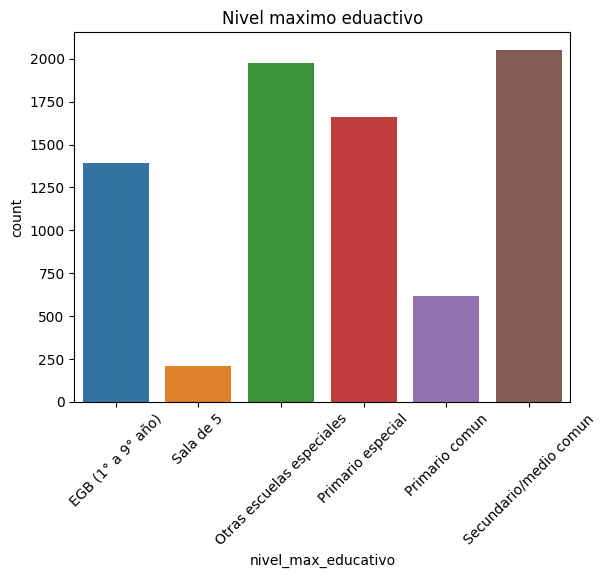

In [45]:
sns.countplot(x=dataframe['nivel_max_educativo'])
plt.title("Nivel maximo eduactivo")
plt.xticks(rotation=45)
plt.show()

#### Boxplot ingresos en funcion de años de escolaridad
con este grafico podemos observar que a medida que aumentan los años de escolaridad aumentan los ingresos total laborables

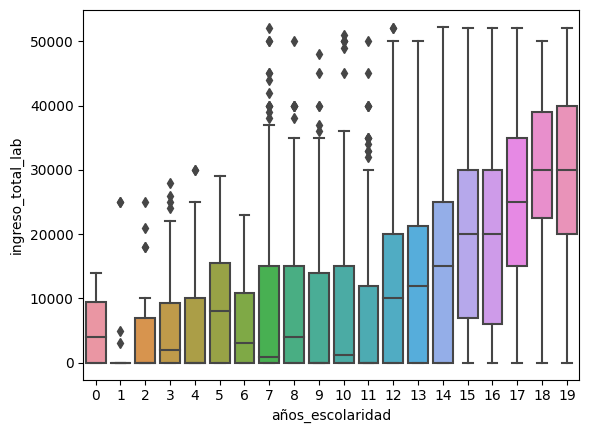

In [46]:
sns.boxplot(x=dataframe['años_escolaridad'], y=dataframe['ingreso_total_lab'])
plt.show()

#### Boxplot ingreso total laborable
+ La distribucion de los datos es asimetrica hacia la derecha
esto tiene sentido ya que hay varias personas en el dataset que no trabajan o no tienen edad para trabajar, 
+ podemos ver que la media es de aproximadamente 13300 pesos, lo cual se aproxima al salario minimo de 2018 (11 mil pesos)

http://www.siasueldos.com/salario-m%C3%ADnimo-vital-y-m%C3%B3vil-actualizaci%C3%B3n-de-montos-septiembre-y-diciembre-2018#:~:text=24%20Septiembre%202018-,SALARIO%20M%C3%8DNIMO%20VITAL%20Y%20M%C3%93VIL%2DACTUALIZACI%C3%93N%20DE%20MONTOS%2DSEPTIEMBRE%20Y,%3A%20%24%2011.300%2C%2D%20mensuales.

+ Encontramos muchos valores atipicos lo que representa que los sueldos mas altos le corresponden a pocsas personas y la mayoria de personas tiene sueldos mas bajos

In [47]:
dataframe['ingreso_total_lab'].describe()

count     7907.000000
mean     14432.970532
std      13916.404608
min          0.000000
25%          0.000000
50%      13000.000000
75%      25000.000000
max      52249.000000
Name: ingreso_total_lab, dtype: float64

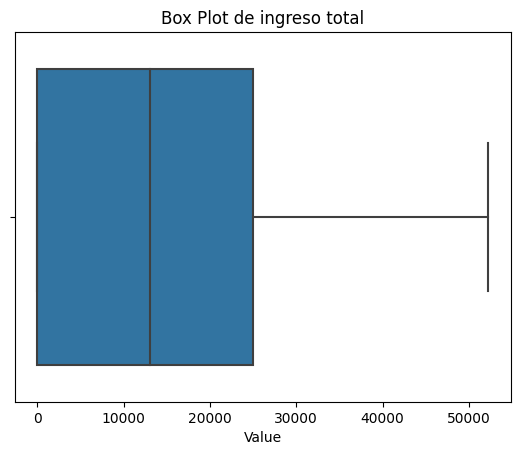

In [48]:
sns.boxplot(x=dataframe['ingreso_total_lab'])
plt.title('Box Plot de ingreso total')
plt.xlabel('Value')
plt.show()

#### Vemos la escolaridad
+ podemos ver que las personas tienen alrededor de 12 años de escolaridad lo que equivaldria a un secundario completo, lo que coincidiria con el grafico de nivel de educacion maximo
+ con un describe vemos que la media esta mas cerca de 0 que la mediana, esto se debe a que hay personas que aun son muy jovenes como para ir a la escuela como tambien hay gente que no asistio o no la termino

In [49]:
dataframe['años_escolaridad'].describe()

count    7907.000000
mean       12.573037
std         3.410126
min         0.000000
25%        11.000000
50%        12.000000
75%        15.000000
max        19.000000
Name: años_escolaridad, dtype: float64

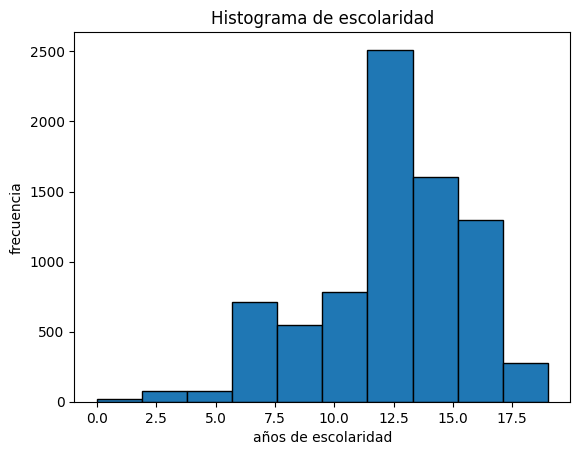

In [50]:
plt.hist(dataframe['años_escolaridad'], bins=10, edgecolor='black')
plt.title('Histograma de escolaridad')
plt.xlabel('años de escolaridad')
plt.ylabel('frecuencia')
plt.show()

#### Edades
en el histograma de edades vemos que las edades se distribuyen de 0 a 99, 0 implicaria que la persona nacio ese año.




In [51]:
dataframe['edad'].describe()

count    7907.000000
mean       41.471734
std        17.588799
min        16.000000
25%        27.000000
50%        38.000000
75%        54.000000
max        98.000000
Name: edad, dtype: float64

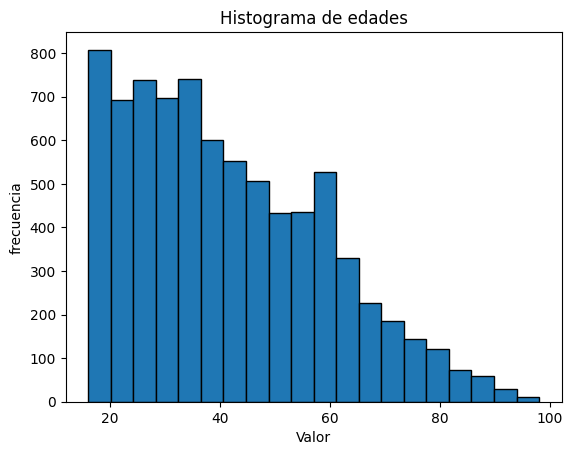

In [52]:
plt.hist(dataframe['edad'], bins=20, edgecolor='black')
plt.title('Histograma de edades')
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.show()

In [53]:
dataframe['estado_ocupacional'].value_counts()

estado_ocupacional
Ocupado       5459
Inactivo      1881
Desocupado     567
Name: count, dtype: int64

#### Scatterplot edad e ingresos
vemos que a lo largo de todas las edades hay una linea con 0 ingresos. Se podria (asumiendo algunas cosas) contar la cantidad de personas que no tienen trabajo con un filtro, vemos que son 2532 personas.

Dentro del filtro una edad menor a 16 es que la persona aun va a la escuela y mayor a 65 seria un estimado que la persona esta jubilada


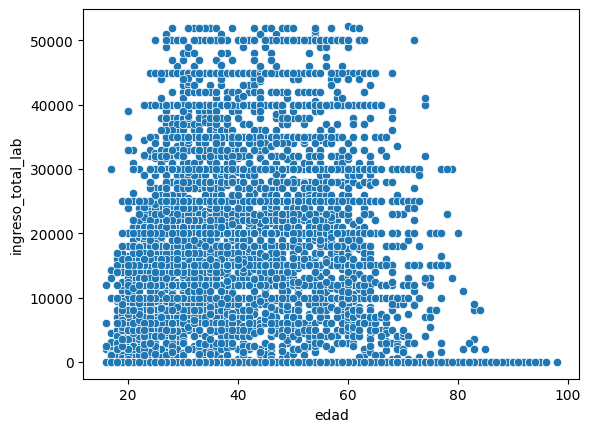

In [54]:
sns.scatterplot(x=dataframe['edad'], y=dataframe['ingreso_total_lab'])
plt.show()

In [55]:
len(dataframe[(dataframe['ingreso_total_lab'] == 0) & (dataframe['edad'] >= 16) & (dataframe['edad'] <= 65)])

1864

#### Hijos_nacidos_vivos
+ El nombre de esta variable es un poco confuso, se puede asumir que se refiere a partos
+ La idea es que No representa que la persona no tiene hijos
+ Si representa que si tiene hijos

podemos ver por el grafico que la mayoria de personas no tiene hijos, con un filtro podemos afirmar esto

Text(0, 0.5, 'frecuencia')

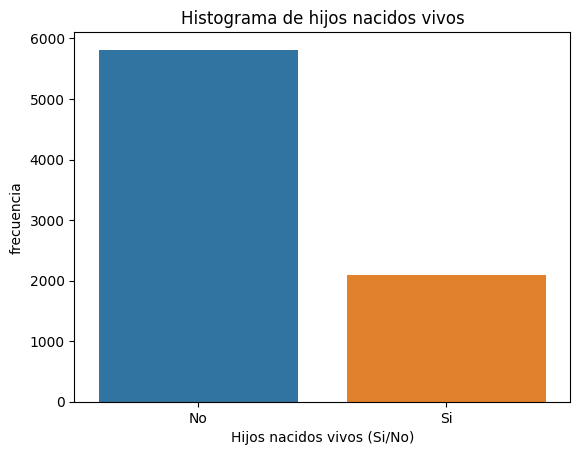

In [56]:
sns.countplot(x='hijos_nacidos_vivos', data=dataframe)
plt.title('Histograma de hijos nacidos vivos')
plt.xlabel('Hijos nacidos vivos (Si/No)')
plt.ylabel('frecuencia')

In [57]:
len(dataframe[(dataframe['hijos_nacidos_vivos'] == 'No')]), len(dataframe[(dataframe['hijos_nacidos_vivos'] == 'Si')])

(5814, 2093)

#### cantidad_hijos_nac_vivos
esta variable es muy asimetrica hacia la derecha, esto se debe a que la gran mayoria de personas no tienen hijos, lo cual comprobamos en el estudio de la columna anterior.

La mayoria de personas que si tienen hijos tienen 1 o 2, asi que esta variable presenta varios valores atipicos

In [58]:
dataframe['cantidad_hijos_nac_vivos'].value_counts()

cantidad_hijos_nac_vivos
0    5814
2    1185
1     908
Name: count, dtype: int64

<Axes: xlabel='cantidad_hijos_nac_vivos'>

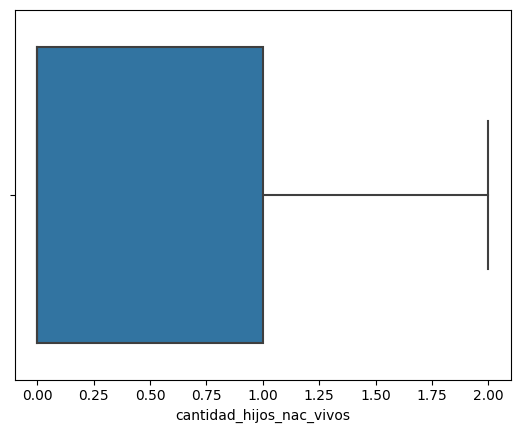

In [59]:
sns.boxplot(x=dataframe['cantidad_hijos_nac_vivos'])

#### Dominio
ahora vemos la distribucion de personas, si viven en partes de la ciudad o villas de emergencia

<Axes: xlabel='dominio', ylabel='count'>

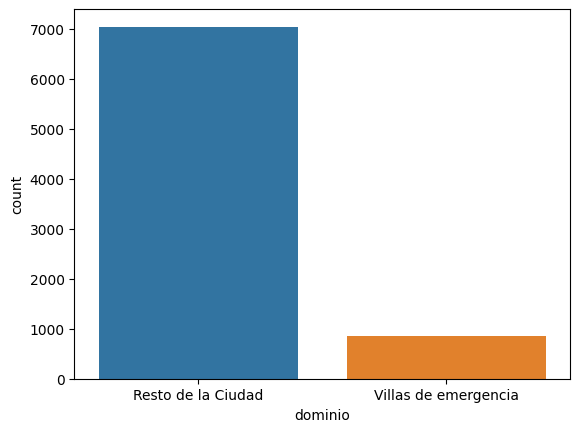

In [60]:
sns.countplot(x='dominio', data=dataframe)

In [61]:
dataframe['dominio'].value_counts()

dominio
Resto de la Ciudad      7044
Villas de emergencia     863
Name: count, dtype: int64

#### Situacion conyugal
Con esta variable vemos que variables que mas datos abarcan son soltero o casado.

Como ayuda hago un boxplot de situacion conyugal en funcion de las edades entonces vemos que no corresponde se le asigna a personas menores de 18 años.

El resto de graficos de caja tienen bastante sentido

In [62]:
cantidad_situacion_conyugal = dataframe['situacion_conyugal'].value_counts()

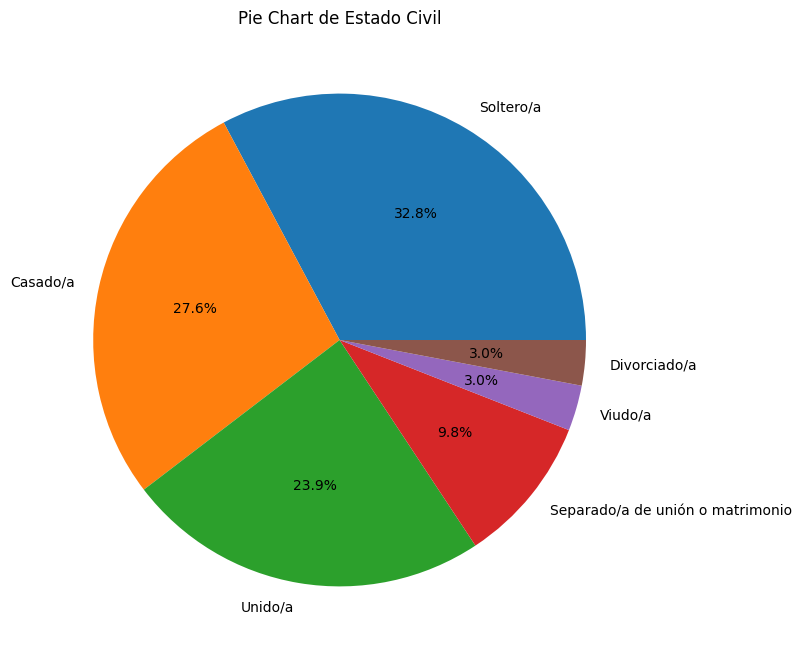

In [63]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_situacion_conyugal, labels=cantidad_situacion_conyugal.index, autopct='%1.1f%%')
plt.title('Pie Chart de Estado Civil')
plt.show()

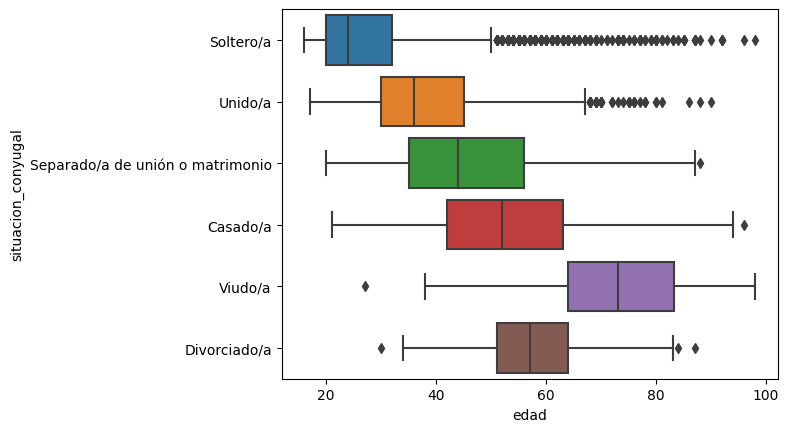

In [64]:
sns.boxplot(x=dataframe['edad'], y=dataframe['situacion_conyugal'])
plt.show()

#### Afiliacion Salud

In [65]:
cantidad_afiliacion_salud = dataframe['afiliacion_salud'].value_counts()

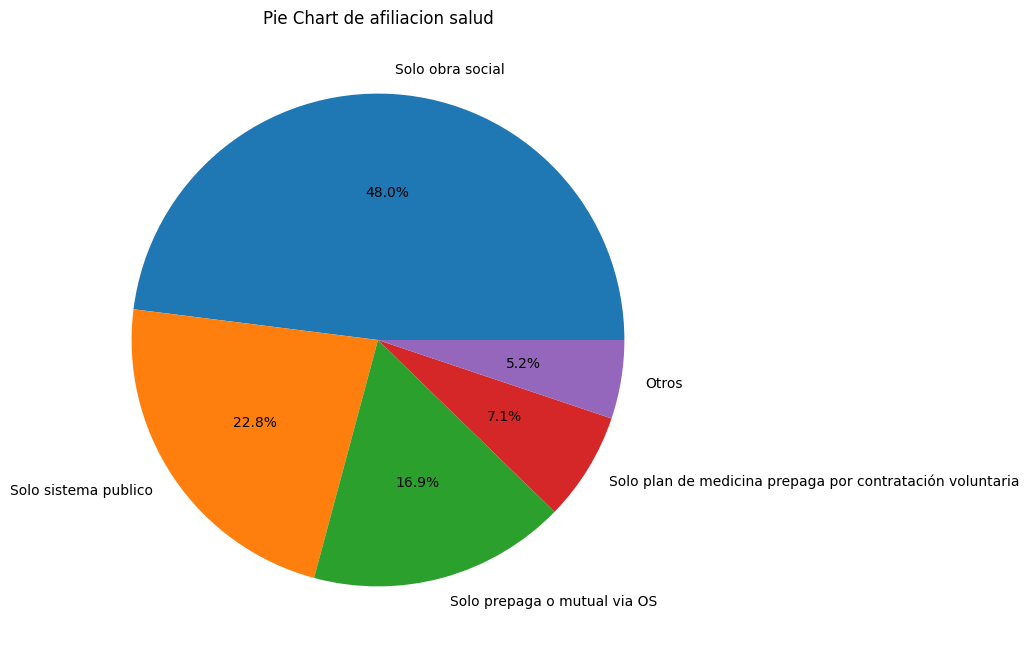

In [66]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_afiliacion_salud, labels=cantidad_afiliacion_salud.index, autopct='%1.1f%%')
plt.title('Pie Chart de afiliacion salud')
plt.show()

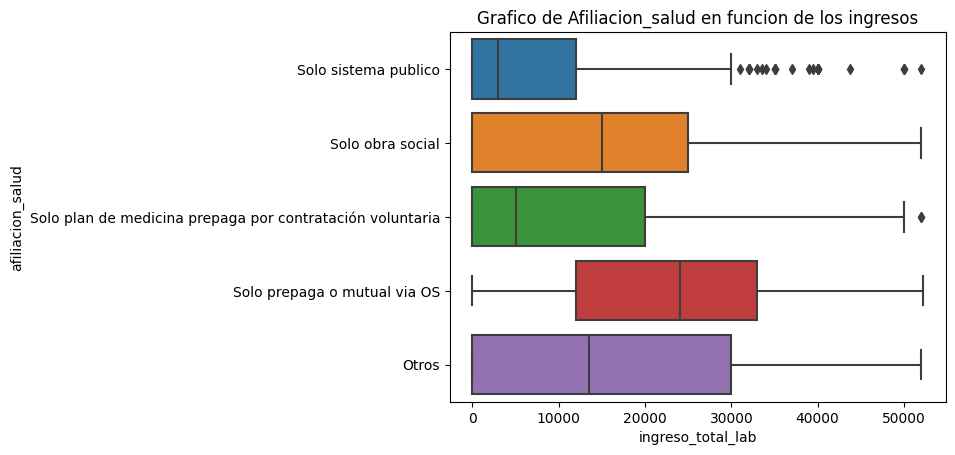

In [67]:
sns.boxplot(x=dataframe['ingreso_total_lab'], y=dataframe['afiliacion_salud'])
plt.title("Grafico de Afiliacion_salud en funcion de los ingresos")
plt.show()

#### Correlaciones
No tengo tantas variables numericas para estudiar pero podemos ver una correlacion positiva muy fuerte entre ingresos laborales e ingresos totales.

todas las variables que consideren ingresos tienen una correlacion positiva entre si (salvo *ingreso_total_lab* y *ingreso_total_no_lab*)

esto se debe a estas columnas son las sumas de las anteriores, por ejemplo ingresos totales por persona seria la suma de *ingreso_total_lab* y *ingreso_total_no_lab*.

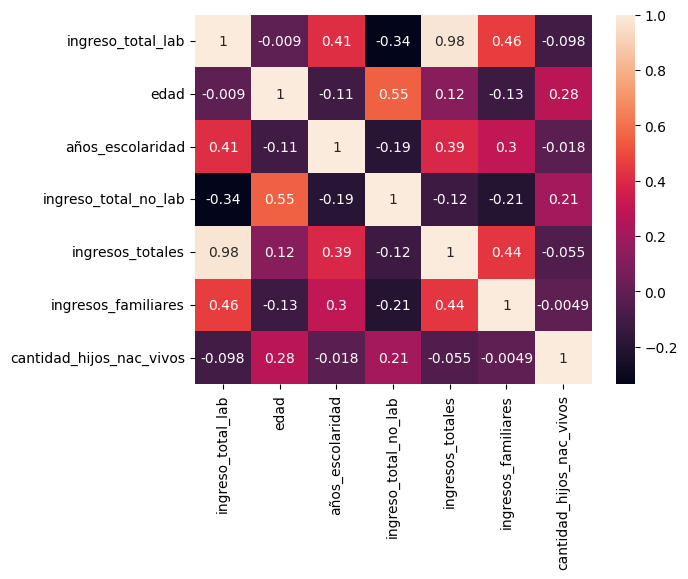

In [68]:
sns.heatmap(dataframe[['ingreso_total_lab', 'edad','años_escolaridad', 'ingreso_total_no_lab', 'ingresos_totales','ingresos_familiares', 'cantidad_hijos_nac_vivos']].corr(), annot=True)
plt.show()

### Codear datos cateogricos
+ Para todas las dummies se uso el metodo de OneHotEncoding

#### Primero busco las columnas categoricas
creo una funcion num_or_cat que me selecciona en las columans del dataframe las variables que son del tipo object como categoricas y las que no como numericas

In [69]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [70]:
categorical_cols, numerical_cols = num_or_cat(dataframe)
categorical_cols

Index(['dominio', 'sexo', 'parentesco_jefe', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'calidad_ingresos_no_lab',
       'calidad_ingresos_totales', 'calidad_ingresos_familiares',
       'estado_educativo', 'sector_educativo', 'nivel_actual',
       'nivel_max_educativo', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos'],
      dtype='object')

#### Establezco columnas de interes
Procedo a crear variables dummy para estas

In [71]:
columnas_categoricas_a_usar = ['dominio', 'sexo', 'hijos_nacidos_vivos','nivel_max_educativo','situacion_conyugal','afiliacion_salud']

In [72]:
for columna in columnas_categoricas_a_usar:
    dominio_dummie = pd.get_dummies(dataframe[columna]).astype(int)
    dataframe = pd.concat([dataframe, dominio_dummie], axis=1)
    dataframe = dataframe.drop(labels=columna ,axis=1)

In [73]:
dataframe = dataframe.rename(columns={'Villas de emergencia': 'villas_de_emergencia',
                                       'Resto de la Ciudad': 'resto_de_la_ciudad',
                                       "No":"hijos_nacidos_no",
                                       "Si":"hijos_nacidos_si",
                                       "Mujer":"sexo_mujer",
                                       "Varon":"sexo_varon",
                                       "EGB (1° a 9° año)": 'educacion_basica_gral',
                                       "Otras escuelas especiales":"otras_escuelas_especiales",
                                       "Primario comun":"primario_comun",
                                       "Primario especial":"primario_especial",
                                       "Sala de 5":"sala_de_5",
                                       "Secundario/medio comun":"Secundario_medio_comun",
                                       "Casado/a":"casado_a",
                                       "Divorciado/a":"divorciado_a",
                                       'No corresponde': 'no_corresponde_estado_civil',
                                       "Separado/a de unión o matrimonio":"separado_a_de_union_o_matrimonio",
                                       "Soltero/a":"soltero_a",
                                       "Unido/a":"unido_a",
                                       "Viudo/a":"viudo_a",
                                       "Otros":"otros_afiliacion_salud",
                                       "Solo obra social":"Solo_obra_social",
                                       "Solo plan de medicina prepaga por contratación voluntaria":"solo_plan_de_medicina_prepaga_por_contratacion_voluntaria",
                                       "Solo prepaga o mutual via OS":"solo_prepaga_o_mutual_via_OS",
                                       "Solo sistema publico":"solo_sistema_publico",
                                       })

In [74]:
dataframe.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'edad', 'parentesco_jefe',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'ingreso_total_lab',
       'calidad_ingresos_no_lab', 'ingreso_total_no_lab',
       'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'años_escolaridad', 'lugar_nacimiento',
       'cantidad_hijos_nac_vivos', 'resto_de_la_ciudad',
       'villas_de_emergencia', 'sexo_mujer', 'sexo_varon', 'hijos_nacidos_no',
       'hijos_nacidos_si', 'educacion_basica_gral',
       'otras_escuelas_especiales', 'primario_comun', 'primario_especial',
       'sala_de_5', 'Secundario_medio_comun', 'casado_a', 'divorciado_a',
       'separado_a_de_union_o_matrimonio', 'soltero_a', 'unido_a', 'viudo_a',
       'otros_afiliacion_salud', 'Solo_obra_social',
    

#### Normalizar datos numericos
solo son 3 columnas numericas las que voy a usar.

El metodo para normalizar va a ser  Z-score o estandarizacion


 $$ z = \frac{x - \mu}{\sigma} $$

In [75]:
numerical_cols

Index(['id', 'nhogar', 'miembro', 'comuna', 'edad', 'ingreso_total_lab',
       'ingreso_total_no_lab', 'ingresos_totales', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'años_escolaridad',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

In [76]:
columnas_numericas_a_usar = ['edad', 'años_escolaridad', 'cantidad_hijos_nac_vivos']

In [77]:
for columna in columnas_numericas_a_usar:
    dataframe[columna] = (dataframe[columna] - dataframe[columna].mean()) / dataframe[columna].std()
    dataframe[columna] = dataframe[columna].round(2)

##### por las dudas

In [78]:
#dataframe['ingreso_total_lab'] = dataframe['ingreso_total_lab']/1000

### Ajustar un modelo de regresion lineal
En este modelo se toma como variable dependiente *ingreso_total_lab*

las variables independientes seran
+ edad
+ años_escolaridad
+ cantidad_hijos_nac_vivos (numerica)
+ dominio
+ sexo
+ hijos_nacidos_vivos (categorica)
+ nivel_max_educativo
+ situacion_conyugal
+ afiliacion_salud

$$
Y = \beta_0 + \beta_e X_1 + \beta_a X_2 + \ldots + \beta_p X_p + \varepsilon
$$

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [80]:
formula_base = """ingreso_total_lab ~ edad + años_escolaridad + cantidad_hijos_nac_vivos + resto_de_la_ciudad + hijos_nacidos_no + 
sexo_varon + casado_a + divorciado_a + separado_a_de_union_o_matrimonio +soltero_a + unido_a + viudo_a +
Solo_obra_social + solo_plan_de_medicina_prepaga_por_contratacion_voluntaria + solo_prepaga_o_mutual_via_OS + solo_sistema_publico +
educacion_basica_gral + otras_escuelas_especiales + primario_comun + primario_especial + sala_de_5 + Secundario_medio_comun
"""



modelo_base = smf.ols(formula=formula_base, data=dataframe)

In [81]:
resultado_base = modelo_base.fit()
resultado_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ingreso_total_lab   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     207.6
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:00:23   Log-Likelihood:                -84986.
No. Observations:                7907   AIC:                         1.700e+05
Df Residuals:                    7886   BIC:                         1.702e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                  1.117e+04    742.719     15.042      0.000    9715.821    1.26e+04
edad                                                      -1924.7428    184.364    -10.440      0.000   -2286.145   -1563.341
años_escolaridad                                           4642.5983    409.110     11.348      0.000    3840.634    5444.563
cantidad_hijos_nac_vivos                                   -975.2405    369.400     -2.640      0.008   -1699.363    -251.118
resto_de_la_ciudad                                          681.9073    465.152      1.466      0.143    -229.913    1593.728
hijos_nacidos_no                                           -668.0858    870.095     -0.768      0.443   -2373.703    1037.531
sexo_varon                                                 5112.1700    346.157     14.768      0.000    4433.611    5790.729
casado_a                                                   2570.4523    304.838      8.432      0.000    1972.889    3168.016
divorciado_a                                               5031.2118    668.225      7.529      0.000    3721.314    6341.110
separado_a_de_union_o_matrimonio                           4841.4118    402.320     12.034      0.000    4052.758    5630.065
soltero_a                                                 -3295.2343    364.633     -9.037      0.000   -4010.012   -2580.457
unido_a                                                    3685.8392    317.819     11.597      0.000    3062.829    4308.849
viudo_a                                                   -1661.9333    700.111     -2.374      0.018   -3034.336    -289.531
Solo_obra_social                                            173.8964    593.237      0.293      0.769    -989.005    1336.798
solo_plan_de_medicina_prepaga_por_contratacion_voluntaria -4495.4800    737.051     -6.099      0.000   -5940.295   -3050.665
solo_prepaga_o_mutual_via_OS                               4144.2732    646.188      6.413      0.000    2877.574    5410.972
solo_sistema_publico                                      -7158.2048    654.486    -10.937      0.000   -8441.171   -5875.239
educacion_basica_gral                                      -922.7512    356.503     -2.588      0.010   -1621.591    -223.911
otras_escuelas_especiales                                 -1321.7289    479.197     -2.758      0.006   -2261.082    -382.376
primario_comun                                             3692.9481    630.176      5.860      0.000    2457.636    4928.260
primario_especial                                            48.6868    343.978      0.142      0.887    -625.601     722.975
sala_de_5                                                  

#### Ajustar el modelo obtenido

In [82]:
formula_ajustada = """ingreso_total_lab ~ edad + años_escolaridad + cantidad_hijos_nac_vivos +
hijos_nacidos_no + sexo_varon + casado_a + divorciado_a + separado_a_de_union_o_matrimonio +
soltero_a + unido_a + viudo_a + Solo_obra_social + solo_prepaga_o_mutual_via_OS +
solo_sistema_publico + educacion_basica_gral + otras_escuelas_especiales + primario_comun + 
primario_especial + sala_de_5 +Secundario_medio_comun"""

In [83]:
modelo_ajustado = smf.ols(formula=formula_ajustada, data=dataframe)

In [84]:
resultado_ajustado = modelo_ajustado.fit()
resultado_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ingreso_total_lab   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     227.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:00:24   Log-Likelihood:                -85006.
No. Observations:                7907   AIC:                         1.700e+05
Df Residuals:                    7888   BIC:                         1.702e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         9695.4305    595.355     16.285      0.000    8528.378    1.09e+04
edad                             -1835.2009    183.466    -10.003      0.000   -2194.843   -1475.558
años_escolaridad                  4670.7970    409.650     11.402      0.000    3867.775    5473.819
cantidad_hijos_nac_vivos          -971.5690    370.262     -2.624      0.009   -1697.380    -245.758
hijos_nacidos_no                  -609.4687    871.862     -0.699      0.485   -2318.550    1099.613
sexo_varon                        5003.5680    346.448     14.442      0.000    4324.439    5682.697
casado_a                          2271.1100    296.372      7.663      0.000    1690.142    2852.078
divorciado_a                      4763.9807    663.934      7.175      0.000    3462.495    6065.466
separado_a_de_union_o_matrimonio  4563.2438    396.375     11.512      0.000    3786.243    5340.244
soltero_a                        -3539.4885    356.942     -9.916      0.000   -4239.190   -2839.787
unido_a                           3463.8336    313.830     11.037      0.000    2848.645    4079.023
viudo_a                          -1827.2491    697.143     -2.621      0.009   -3193.834    -460.664
Solo_obra_social                  2768.2135    411.629      6.725      0.000    1961.311    3575.116
solo_prepaga_o_mutual_via_OS      6778.9482    482.507     14.049      0.000    5833.107    7724.789
solo_sistema_publico             -4681.7506    480.301     -9.748      0.000   -5623.267   -3740.234
educacion_basica_gral            -1170.9879    348.957     -3.356      0.001   -1855.036    -486.940
otras_escuelas_especiales        -1529.6555    467.472     -3.272      0.001   -2446.024    -613.287
primario_comun                    3492.9530    627.622      5.565      0.000    2262.647    4723.259
primario_especial                 -186.7776    332.888     -0.561      0.575    -839.325     465.770
sala_de_5                         6851.0674   1089.654      6.287      0.000    4715.056    8987.079
Secundario_medio_comun            2238.8311    749.256      2.988      0.003     770.091    3707.571
==============================================================================
Omnibus:                      216.796   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.289
Skew:                           0.416   Prob(JB):                     1.33e-51
Kurtosis:                       3.132   Cond. No.                     7.85e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-28. This might indicate that there are
strong mu

#### Residuos

In [85]:
dataframe['pred'] = resultado_ajustado.predict(dataframe)
dataframe['residuos'] = dataframe['ingreso_total_lab']-dataframe['pred']


In [86]:
dataframe['residuos'] = dataframe['residuos'].round(2)

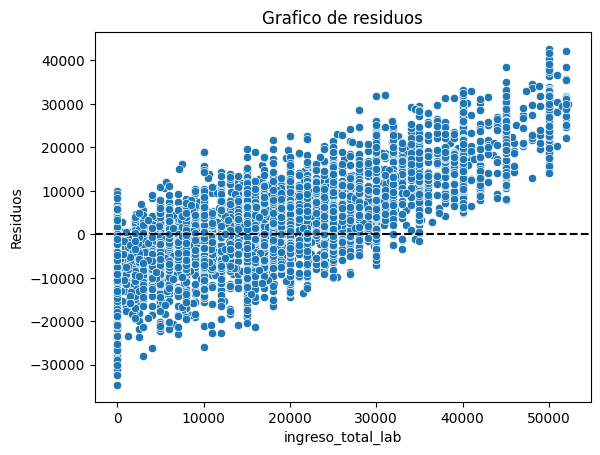

In [87]:
sns.scatterplot(x=dataframe['ingreso_total_lab'], y =dataframe['residuos'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('ingreso_total_lab')
plt.ylabel('Residuos')
plt.title('Grafico de residuos')
plt.show()